# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [42]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Impor the OpenWeatherMap API key
!pip install citipy
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [43]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [44]:
# Set the API base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?""

#set up parameters
units = "imperial"

params = {
    "q":city,
    "appid": weather_api_key,
    "units": units
}


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city

    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
 # Run an API request for each of the cities
    try:

        params["q"] = city
        city_url = requests.get(base_url, params = params).json() 
        
        # Parse the JSON and retrieve data
        city_weather = city_url["weather"][0]["main"]

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_url["coord"]["lat"] #longitude 
        city_lng = city_url["coord"]["lon"] #longitude
        city_max_temp = city_url["main"]["temp_max"] #max temp
        city_humidity = city_url["main"]["humidity"] #humidity
        city_clouds = city_url["clouds"]["all"] #clouds
        city_wind = city_url["wind"]["speed"] #wind speed
        city_country = city_url["sys"]["country"] #country of city
        city_date = city_url["dt"]


        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    except:
        print(f"{city} not found. Skipping...")
        pass

              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pyapon
Processing Record 2 of Set 1 | isafjordur
Processing Record 3 of Set 1 | marechal deodoro
Processing Record 4 of Set 1 | iqaluit
Processing Record 5 of Set 1 | bull savanna
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | rawson
Processing Record 8 of Set 1 | margaret river
Processing Record 9 of Set 1 | talnakh
Processing Record 10 of Set 1 | bilibino
Processing Record 11 of Set 1 | bethel
Processing Record 12 of Set 1 | sinabang
Processing Record 13 of Set 1 | touros
Processing Record 14 of Set 1 | vorgashor
Processing Record 15 of Set 1 | stanley
Processing Record 16 of Set 1 | ust-nera
Processing Record 17 of Set 1 | puerto natales
Processing Record 18 of Set 1 | howard springs
Processing Record 19 of Set 1 | nizhnevartovsk
Processing Record 20 of Set 1 | villa tupac amaru
Processing Record 21 of Set 1 | port lincoln
Processing Record 22 of Set 1 | ostersund
Proce

Processing Record 40 of Set 4 | jinka
Processing Record 41 of Set 4 | enewetak
Processing Record 42 of Set 4 | klyuchi
Processing Record 43 of Set 4 | cozumel
Processing Record 44 of Set 4 | grajau
Processing Record 45 of Set 4 | tazovsky
Processing Record 46 of Set 4 | sandnessjoen
Processing Record 47 of Set 4 | labrador city
Processing Record 48 of Set 4 | fort portal
Processing Record 49 of Set 4 | balsas
Processing Record 0 of Set 5 | bereeda
Processing Record 1 of Set 5 | burley
Processing Record 2 of Set 5 | tsiombe
Processing Record 3 of Set 5 | pasuquin
Processing Record 4 of Set 5 | broken hill
Processing Record 5 of Set 5 | ljungby
Processing Record 6 of Set 5 | sisimiut
Processing Record 7 of Set 5 | egilsstadir
Processing Record 8 of Set 5 | nabburg
Processing Record 9 of Set 5 | long beach
Processing Record 10 of Set 5 | guerrero
Processing Record 11 of Set 5 | pelabuhanratu
Processing Record 12 of Set 5 | kupang
Processing Record 13 of Set 5 | guangyuan
Processing Record

Processing Record 30 of Set 8 | parfino
Processing Record 31 of Set 8 | kargil
Processing Record 32 of Set 8 | puerto baquerizo moreno
Processing Record 33 of Set 8 | vilyuysk
Processing Record 34 of Set 8 | mata-utu
Processing Record 35 of Set 8 | conde
Processing Record 36 of Set 8 | sao jose da coroa grande
Processing Record 37 of Set 8 | grand falls-windsor
Processing Record 38 of Set 8 | bamboo flat
Processing Record 39 of Set 8 | praia da vitoria
Processing Record 40 of Set 8 | happy valley-goose bay
Processing Record 41 of Set 8 | dvubratskiy
Processing Record 42 of Set 8 | sysert'
Processing Record 43 of Set 8 | tindouf
Processing Record 44 of Set 8 | rizhao
Processing Record 45 of Set 8 | porto-vecchio
Processing Record 46 of Set 8 | ivatsevichy
Processing Record 47 of Set 8 | qamdo
Processing Record 48 of Set 8 | onega
Processing Record 49 of Set 8 | ban phe
ban phe not found. Skipping...
Processing Record 0 of Set 9 | ust-tsilma
Processing Record 1 of Set 9 | togur
Processin

Processing Record 14 of Set 12 | tan-tan
Processing Record 15 of Set 12 | nyandoma
Processing Record 16 of Set 12 | selkirk
Processing Record 17 of Set 12 | hechuan
Processing Record 18 of Set 12 | petauke
Processing Record 19 of Set 12 | zhuanghe
Processing Record 20 of Set 12 | balapur
Processing Record 21 of Set 12 | pemangkat
Processing Record 22 of Set 12 | forster
Processing Record 23 of Set 12 | shahpur chakar
Processing Record 24 of Set 12 | santa cruz
Processing Record 25 of Set 12 | cabo san lucas
Processing Record 26 of Set 12 | floro
Processing Record 27 of Set 12 | olinda
Processing Record 28 of Set 12 | ebon
Processing Record 29 of Set 12 | uttar char fasson
Processing Record 30 of Set 12 | arvayheer
Processing Record 31 of Set 12 | yangiqo'rg'on
Processing Record 32 of Set 12 | tosontsengel
Processing Record 33 of Set 12 | calabozo
Processing Record 34 of Set 12 | sao vicente
Processing Record 35 of Set 12 | karukh
Processing Record 36 of Set 12 | nuuk
Processing Record 

In [45]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [46]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pyapon,16.2833,95.6833,99.18,31,16,9.17,MM,1681623229
1,isafjordur,66.0755,-23.1240,34.59,89,100,7.14,IS,1681623229
2,marechal deodoro,-9.7103,-35.8950,74.61,86,15,2.42,BR,1681623229
3,iqaluit,63.7506,-68.5145,15.53,79,100,25.32,CA,1681623229
4,bull savanna,17.8868,-77.5902,73.80,87,89,6.93,JM,1681623229


In [47]:

# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [48]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,pyapon,16.2833,95.6833,99.18,31,16,9.17,MM,1681623229
1,isafjordur,66.0755,-23.1240,34.59,89,100,7.14,IS,1681623229
2,marechal deodoro,-9.7103,-35.8950,74.61,86,15,2.42,BR,1681623229
3,iqaluit,63.7506,-68.5145,15.53,79,100,25.32,CA,1681623229
4,bull savanna,17.8868,-77.5902,73.80,87,89,6.93,JM,1681623229


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

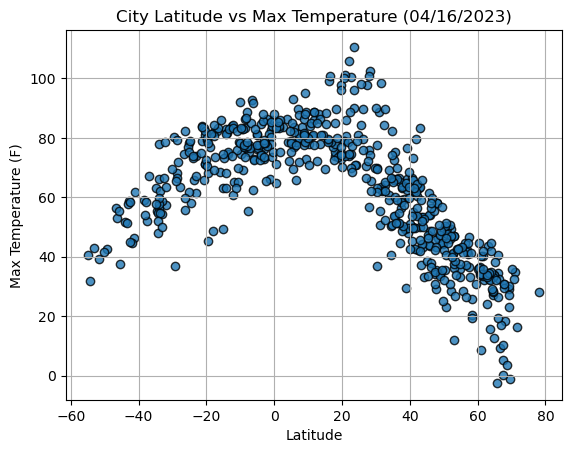

In [49]:
# Build scatter plot for latitude vs. temperature
today = time.strftime("%m/%d/%Y")
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"], edgecolors="black", alpha = 0.8)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs Max Temperature ({today})")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

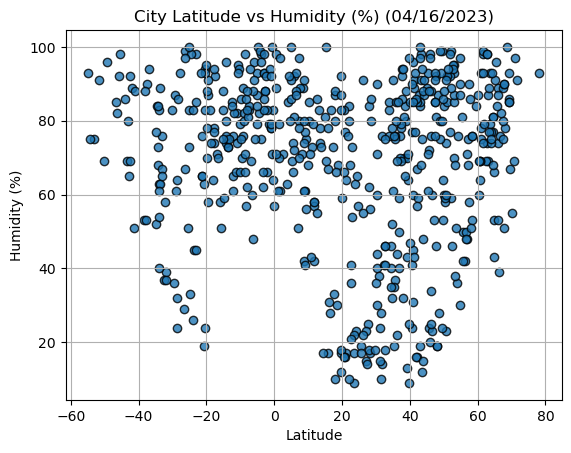

In [50]:
# Build the scatter plots for latitude vs. humidity
today = time.strftime("%m/%d/%Y")
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"],edgecolors="black", alpha = 0.8)


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity (%) ({today})")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

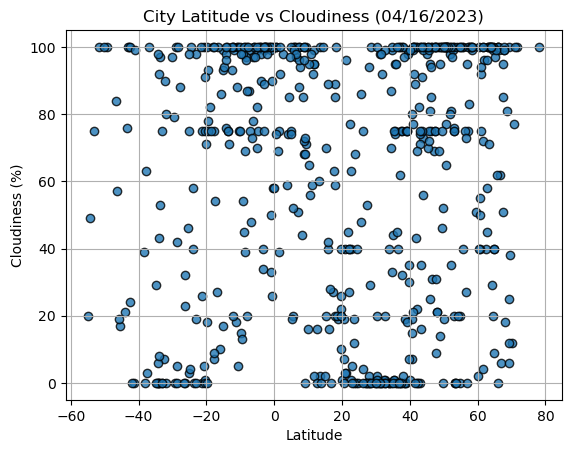

In [51]:
# Build the scatter plots for latitude vs. cloudiness
today = time.strftime("%m/%d/%Y")
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha = 0.8)


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness ({today})")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

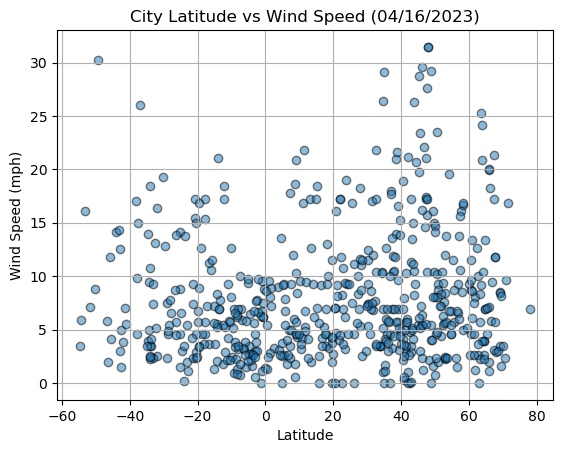

In [52]:
# Build the scatter plots for latitude vs. wind speed
today = time.strftime("%m/%d/%Y")
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha = 0.5)


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs Wind Speed ({today})")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [53]:
# Define a function to create Linear Regression plots 
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Run regresson on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [54]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,pyapon,16.2833,95.6833,99.18,31,16,9.17,MM,1681623229
1,isafjordur,66.0755,-23.1240,34.59,89,100,7.14,IS,1681623229
3,iqaluit,63.7506,-68.5145,15.53,79,100,25.32,CA,1681623229
4,bull savanna,17.8868,-77.5902,73.80,87,89,6.93,JM,1681623229
8,talnakh,69.4865,88.3972,-1.17,67,38,1.57,RU,1681623229


In [55]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,marechal deodoro,-9.7103,-35.8950,74.61,86,15,2.42,BR,1681623229
5,waitangi,-43.9535,-176.5597,51.82,86,21,14.14,NZ,1681623229
6,rawson,-43.3002,-65.1023,51.42,69,76,14.34,AR,1681623060
7,margaret river,-33.9500,115.0667,66.16,63,92,10.76,AU,1681623229
12,touros,-5.1989,-35.4608,76.12,93,99,9.35,BR,1681623087


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.74527998785293


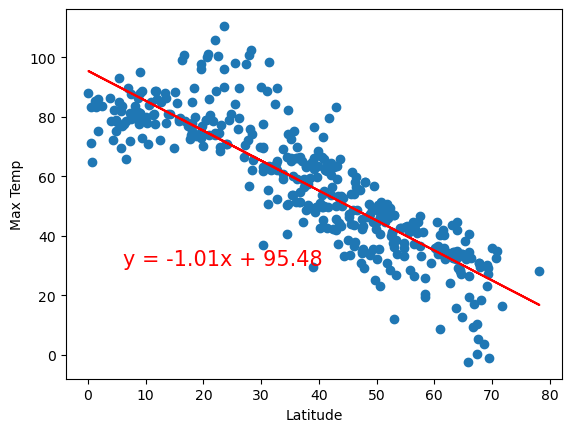

<Figure size 640x480 with 0 Axes>

In [62]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(6,30))
plt.savefig("output_data/Fig5.png")

The r-value is: 0.5424330133505318


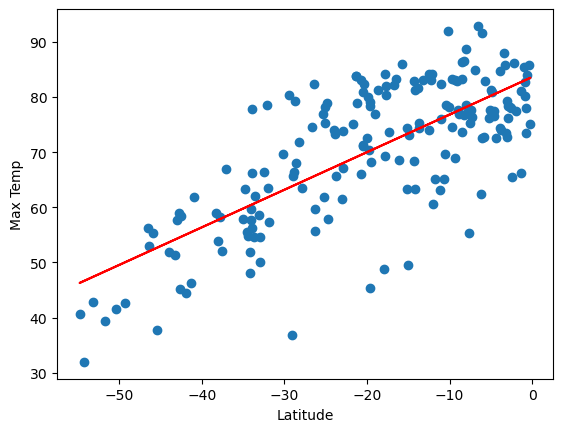

<Figure size 640x480 with 0 Axes>

In [58]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(-50, 20))
plt.savefig("output_data/Fig6.png")

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.027339180296069


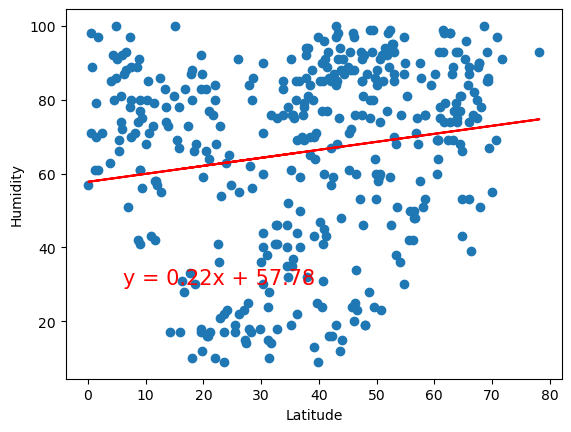

<Figure size 640x480 with 0 Axes>

In [69]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(6,30))
plt.savefig("output_data/Fig6.png")

The r-value is: 0.03067212837639133


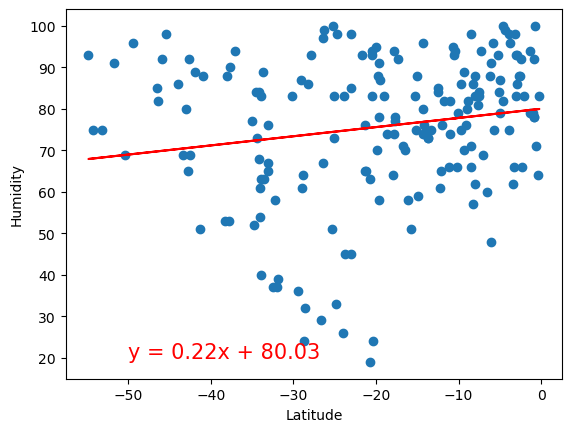

<Figure size 640x480 with 0 Axes>

In [70]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(-50, 20))
plt.savefig("output_data/Fig7.png")

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.021867397205308104


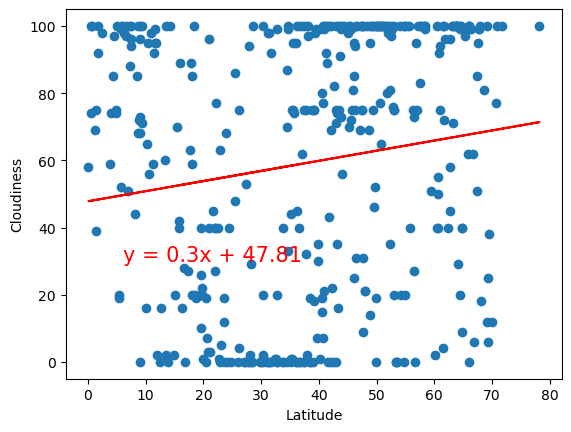

<Figure size 640x480 with 0 Axes>

In [74]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness',(6, 30))
plt.savefig("output_data/Fig8.png")

The r-value is: 0.11662037471590814


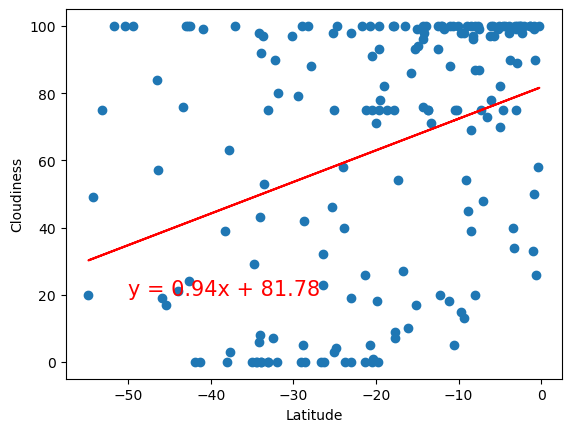

<Figure size 640x480 with 0 Axes>

In [75]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness',(-50, 20))
plt.savefig("output_data/Fig9.png")

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0128009826892063


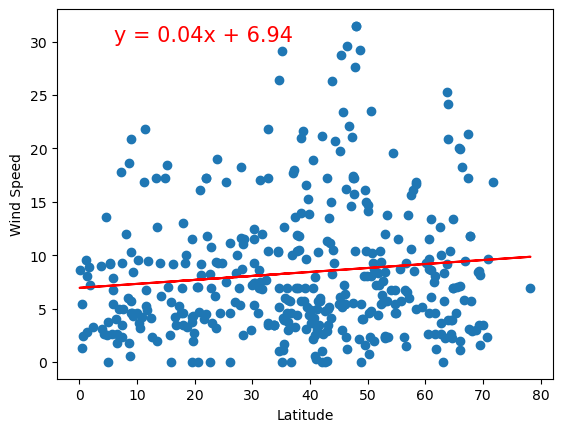

<Figure size 640x480 with 0 Axes>

In [76]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed',(6,30))
plt.savefig("output_data/Fig10.png")

The r-value is: 0.07552547466486075


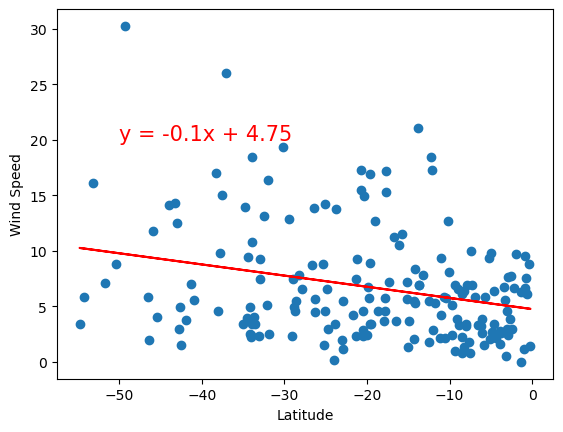

<Figure size 640x480 with 0 Axes>

In [77]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed',(-50, 20))
plt.savefig("output_data/Fig11.png")